### Importing the Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

### Model and Function Definitions

In [2]:
class LogisticRegression:
    def __init__(self):
        pass
    
    def fit(self, X, Y, alpha=0.1, epochs=10):
        X_ = np.ones((X.shape[0], X.shape[1]+1))
        X_[:, 1:] = X
        self.b = np.zeros((X_.shape[1]))
        
        for i in range(epochs):
            Z = np.dot(X_, self.b.T).reshape(-1, 1)
            Y_ = 1 / (1 + np.exp(-Z))
            grad = (Y - Y_) * Y_ * (1 - Y_) * X_
            self.b = self.b + alpha * np.mean(grad, axis=0)
            
    def predict(self, X):
        Y_ = self.probs(X)
        return np.array(Y_ > 0.5, dtype=np.uint8)
    
    def probs(self, X):
        X_ = np.ones((X.shape[0], X.shape[1]+1))
        X_[:, 1:] = X
        Z = np.dot(X_, self.b.T).reshape(-1, 1)
        Y_ = 1 / (1 + np.exp(-Z))
        return Y_

In [3]:
def accuracy(Y, Y_pred):
    return np.sum(np.array(Y == Y_pred, dtype=np.uint8)) / len(Y)

### Read Input Data

In [4]:
df = pd.read_csv('dataset.csv')

df.head()

,X1,X2,Y
0,2.781084,2.550537,0
1,1.465489,2.362125,0
2,3.396562,4.400294,0
3,1.388070,1.850220,0
4,3.064072,3.005306,0


### Single Variable Logistic Regression

In [5]:
df_train, df_test = train_test_split(df[['X1', 'Y']], test_size=0.4, stratify=df['Y'])

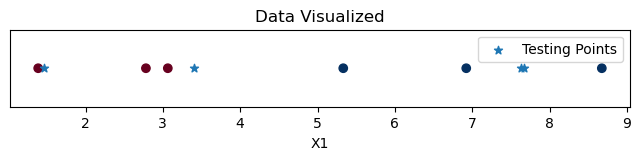

In [6]:
plt.figure(figsize=(8, 1))
plt.scatter(df_train['X1'], [0] * len(df_train['X1']), c=df_train['Y'], cmap=plt.cm.RdBu)
plt.scatter(df_test['X1'], [0] * len(df_test['X1']), marker='*', label='Testing Points')
plt.title('Data Visualized')
plt.xlabel('X1')
plt.yticks([])
plt.legend()
plt.show()

In [7]:
X_train, Y_train = df_train[['X1']].values, df_train[['Y']].values
X_test, Y_test = df_test[['X1']].values, df_test[['Y']].values

In [8]:
model = LogisticRegression()
model.fit(X_train, Y_train, alpha=0.2, epochs=50)

In [9]:
Y_pred = model.predict(X_test)

In [10]:
print(f"Accuracy: {accuracy(Y_test, Y_pred)}")

Accuracy: 0.75


In [11]:
x_min, x_max = df['X1'].min() - 1, df['X1'].max() + 1
y_min, y_max = -1, 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max), np.linspace(y_min, y_max))
xx_test = np.c_[xx.ravel()]
Z = model.probs(xx_test)
Z = Z.reshape(xx.shape)

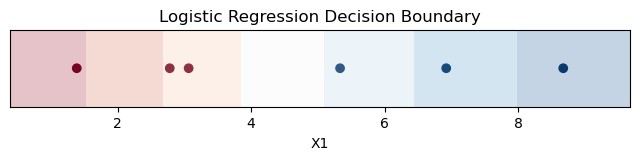

In [12]:
plt.figure(figsize=(8, 1))
plt.scatter(df_train['X1'], [0] * len(df_train['X1']), c=df_train['Y'], cmap=plt.cm.RdBu)
plt.contourf(xx, yy, Z, cmap=plt.cm.RdBu, alpha=0.25)
plt.title('Logistic Regression Decision Boundary')
plt.xlabel('X1')
plt.yticks([])
plt.show()

### Two Variable Logistic Regression

In [13]:
df_train, df_test = train_test_split(df, test_size=0.4, stratify=df['Y'])

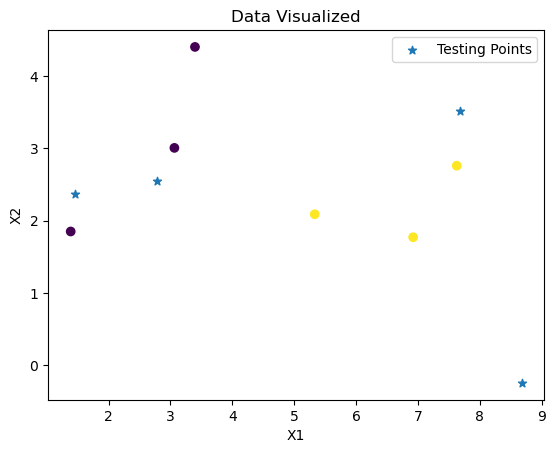

In [14]:
plt.scatter(df_train['X1'], df_train['X2'], marker='o', c=df_train['Y'])
plt.scatter(df_test['X1'], df_test['X2'], marker='*', label='Testing Points')
plt.title('Data Visualized')
plt.xlabel('X1')
plt.ylabel('X2')
plt.legend()
plt.show()

In [15]:
X_train, Y_train = df_train[['X1', 'X2']].values, df_train[['Y']].values
X_test, Y_test = df_test[['X1', 'X2']].values, df_test[['Y']].values

In [16]:
model = LogisticRegression()
model.fit(X_train, Y_train, epochs=50)

In [17]:
Y_pred = model.predict(X_test)

In [18]:
print(f"Accuracy : {accuracy(Y_test, Y_pred)}")

Accuracy : 1.0


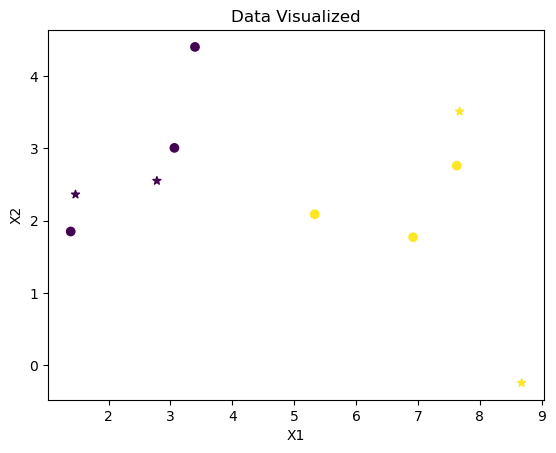

In [19]:
plt.scatter(df_train['X1'], df_train['X2'], marker='o', c=df_train['Y'])
plt.scatter(df_test['X1'], df_test['X2'], marker='*', c=Y_pred)
plt.title('Data Visualized')
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()

In [20]:
x_min, x_max = df['X1'].min() - 1, df['X1'].max() + 1
y_min, y_max = df['X2'].min() - 1, df['X2'].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max), np.linspace(y_min, y_max))
xxyy_test = np.c_[xx.ravel(), yy.ravel()]
Z = model.probs(xxyy_test)
Z = Z.reshape(xx.shape)

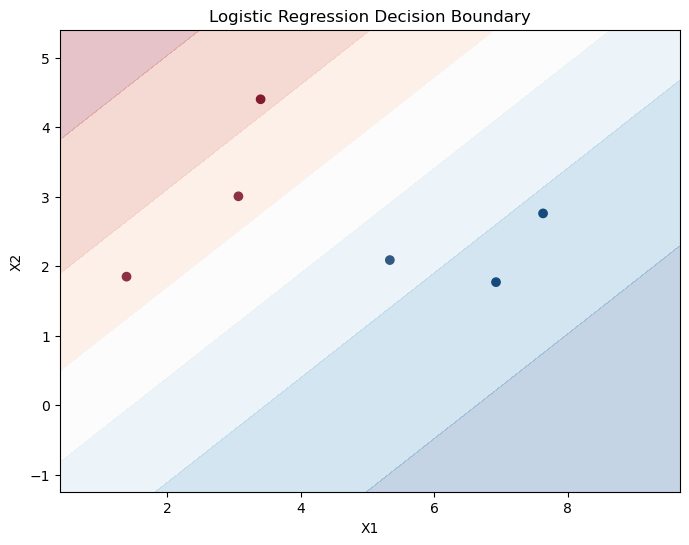

In [21]:
plt.figure(figsize=(8, 6))
plt.scatter(df_train['X1'], df_train['X2'], c=df_train['Y'], cmap=plt.cm.RdBu)
plt.contourf(xx, yy, Z, cmap=plt.cm.RdBu, alpha=0.25)
plt.title('Logistic Regression Decision Boundary')
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()